# Imports:

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # Kernel dies without it
from deepCR import deepCR
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from deepCR import deepCR
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Data Exploration:

In [3]:
image = fits.getdata("jdba2sooq_flc.fits") # Example image from the authors

In [4]:
plt.style.use(astropy_mpl_style) # Style for fits images

In [5]:
image_file = get_pkg_data_filename('jdba2sooq_flc.fits')

In [6]:
image_data = fits.getdata(image_file, ext=0)

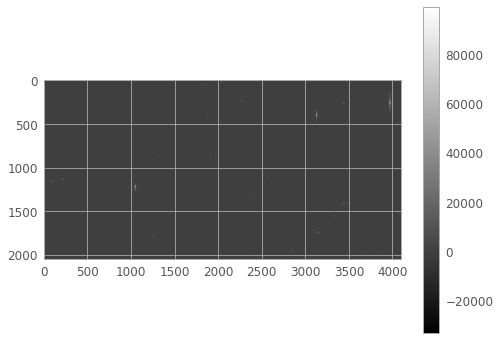

In [8]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

# Work with the model:

In [7]:
image = fits.getdata("jdba2sooq_flc.fits")[:512,:512]

# create an instance of deepCR with specified model configuration
mdl = deepCR(mask='ACS-WFC',inpaint='ACS-WFC-F606W-2-32', device="CPU")

# apply to input image
#cleaned_image = mdl.clean(image, threshold = 0.5, n_jobs=-1)
# best threshold is highest value that generate mask covering full extent of CR
# choose threshold by visualizing outputs.

# if you only need CR mask you may skip image inpainting and save time
mask = mdl.clean(image, threshold = 0.5, inpaint=False)

# if you want probabilistic cosmic ray mask instead of binary mask
prob_mask = mdl.clean(image, binary=False)

C:\Users\Anastasia\anaconda3\envs\DEEPRAY\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [23]:
#print(prob_mask[4])
maximum = 0;
for i in range(512):
    if (max(prob_mask[i])>0.5):
        print("Coordinates of the Cosmic Ray:", "(", i, ",", np.argmax(prob_mask[i]),")")


Coordinates of the Comsmic Ray: ( 16 , 274 )
Coordinates of the Comsmic Ray: ( 83 , 376 )
Coordinates of the Comsmic Ray: ( 84 , 376 )
Coordinates of the Comsmic Ray: ( 85 , 376 )
Coordinates of the Comsmic Ray: ( 106 , 167 )
Coordinates of the Comsmic Ray: ( 116 , 15 )
Coordinates of the Comsmic Ray: ( 277 , 168 )
Coordinates of the Comsmic Ray: ( 278 , 168 )
Coordinates of the Comsmic Ray: ( 285 , 143 )
Coordinates of the Comsmic Ray: ( 286 , 143 )
Coordinates of the Comsmic Ray: ( 344 , 385 )
Coordinates of the Comsmic Ray: ( 345 , 385 )
Coordinates of the Comsmic Ray: ( 389 , 328 )
Coordinates of the Comsmic Ray: ( 445 , 353 )
Coordinates of the Comsmic Ray: ( 485 , 456 )


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

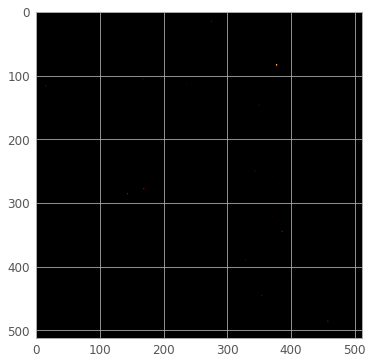

In [10]:
plt.imshow(prob_mask[:,:])

# Save image:

In [9]:
hdu = fits.PrimaryHDU(image_data) # Type the name of the array you want to save inside the parentheses

In [10]:
hdu.writeto('image_data.fits', overwrite=True) # Write the filename you want it to be saved to - the overwrite True
                                         # allows you to overwrite the file, by default it is false.
print("File saved")

File saved


# Idea:

In [ ]:
'''
    Find out the pixels with mask probability > 50%
    Copy the average of 10 nearby pixels that have the probability < 50% into the potential "CR" pixel
'''